Importing required packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

LOADING THE DATA

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/ML(FALL 23-24)/Tata-steel.csv')

In [ ]:
data

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,03-Jul-15,308.00,308.00,299.75,300.95,302.708180,499554,6430,151219082,118810.0,23.78,8.25,-7.05
1,06-Jul-15,294.90,299.60,292.30,298.75,295.646338,663354,9184,196118181,117663.0,17.74,7.30,3.85
2,07-Jul-15,300.75,303.25,296.00,297.45,299.477691,877207,8581,262703927,211277.0,24.09,7.25,-3.30
3,08-Jul-15,293.80,294.00,282.00,283.40,286.875105,1446189,20272,414875621,563505.0,38.96,12.00,-10.40
4,09-Jul-15,285.20,287.25,279.60,280.55,282.860975,974983,13946,275784642,330248.0,33.87,7.65,-4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,28-Jun-21,1174.95,1189.20,1163.20,1184.05,1179.142175,749944,14773,884290599,112782.0,15.04,26.00,9.10
1481,29-Jun-21,1186.00,1195.00,1165.50,1172.45,1177.493063,675052,18471,794869047,197679.0,29.28,29.50,-13.55
1482,30-Jun-21,1179.50,1190.95,1162.50,1166.85,1180.272142,326616,8916,385495766,44078.0,13.50,28.45,-12.65
1483,01-Jul-21,1170.05,1176.55,1156.90,1163.35,1166.601920,351105,10332,409599767,66928.0,19.06,19.65,-6.70


In [ ]:
data.isnull().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         1
% Deli. Qty to Traded Qty    1
Spread High-Low              0
Spread Close-Open            0
dtype: int64

In [ ]:
data['Deliverable Quantity']=data['Deliverable Quantity'].fillna(data['Deliverable Quantity'].mean())
data['% Deli. Qty to Traded Qty']=data['% Deli. Qty to Traded Qty'].fillna(data['% Deli. Qty to Traded Qty'].mean())

In [ ]:
data

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,03-Jul-15,308.00,308.00,299.75,300.95,302.708180,499554,6430,151219082,118810.0,23.78,8.25,-7.05
1,06-Jul-15,294.90,299.60,292.30,298.75,295.646338,663354,9184,196118181,117663.0,17.74,7.30,3.85
2,07-Jul-15,300.75,303.25,296.00,297.45,299.477691,877207,8581,262703927,211277.0,24.09,7.25,-3.30
3,08-Jul-15,293.80,294.00,282.00,283.40,286.875105,1446189,20272,414875621,563505.0,38.96,12.00,-10.40
4,09-Jul-15,285.20,287.25,279.60,280.55,282.860975,974983,13946,275784642,330248.0,33.87,7.65,-4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,28-Jun-21,1174.95,1189.20,1163.20,1184.05,1179.142175,749944,14773,884290599,112782.0,15.04,26.00,9.10
1481,29-Jun-21,1186.00,1195.00,1165.50,1172.45,1177.493063,675052,18471,794869047,197679.0,29.28,29.50,-13.55
1482,30-Jun-21,1179.50,1190.95,1162.50,1166.85,1180.272142,326616,8916,385495766,44078.0,13.50,28.45,-12.65
1483,01-Jul-21,1170.05,1176.55,1156.90,1163.35,1166.601920,351105,10332,409599767,66928.0,19.06,19.65,-6.70


In [ ]:
data['Date']=pd.to_datetime(data['Date'], format='%d-%b-%y', errors='coerce')

In [144]:
#lets us consider open price for forecasting
df=pd.DataFrame(data['Close Price'])

Text(0, 0.5, 'OPEN PRICE')

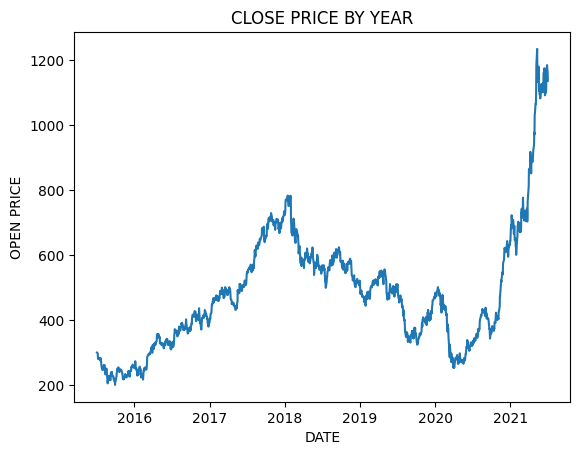

In [145]:
#plot betwenn open price and data
plt.plot(data['Date'],df)
plt.title('CLOSE PRICE BY YEAR')
plt.xlabel('DATE')
plt.ylabel('OPEN PRICE')

In [143]:
# Function to create a dataset with sliding windows
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [148]:
# Load stock price data (replace 'your_stock_data.csv' with your dataset)
# The dataset should have a column named 'Close' for stock closing prices
df = df['Close Price'].values.reshape(-1, 1)

In [149]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(df)


In [150]:
# Split the dataset into training and testing sets
train_size = int(len(data_normalized) * 0.8)
test_size = len(data_normalized) - train_size
train, test = data_normalized[0:train_size, :], data_normalized[train_size:len(data_normalized), :]

In [151]:
# Create datasets for training and testing using sliding windows
look_back = 20  # Number of previous time steps to use for prediction
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [152]:
# Reshape the input data to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [153]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(1, look_back)))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [154]:
# Train the model
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1168/1168 - 5s - loss: 0.0013 - 5s/epoch - 4ms/step
Epoch 2/100
1168/1168 - 3s - loss: 4.0283e-04 - 3s/epoch - 3ms/step
Epoch 3/100
1168/1168 - 2s - loss: 3.3085e-04 - 2s/epoch - 2ms/step
Epoch 4/100
1168/1168 - 2s - loss: 3.3749e-04 - 2s/epoch - 2ms/step
Epoch 5/100
1168/1168 - 2s - loss: 2.7618e-04 - 2s/epoch - 2ms/step
Epoch 6/100
1168/1168 - 2s - loss: 2.3474e-04 - 2s/epoch - 2ms/step
Epoch 7/100
1168/1168 - 3s - loss: 2.3294e-04 - 3s/epoch - 2ms/step
Epoch 8/100
1168/1168 - 3s - loss: 2.2246e-04 - 3s/epoch - 3ms/step
Epoch 9/100
1168/1168 - 3s - loss: 2.2080e-04 - 3s/epoch - 2ms/step
Epoch 10/100
1168/1168 - 2s - loss: 2.0045e-04 - 2s/epoch - 2ms/step
Epoch 11/100
1168/1168 - 2s - loss: 1.9963e-04 - 2s/epoch - 2ms/step
Epoch 12/100
1168/1168 - 2s - loss: 2.0043e-04 - 2s/epoch - 2ms/step
Epoch 13/100
1168/1168 - 2s - loss: 2.0819e-04 - 2s/epoch - 2ms/step
Epoch 14/100
1168/1168 - 3s - loss: 2.0046e-04 - 3s/epoch - 3ms/step
Epoch 15/100
1168/1168 - 3s - loss: 1.9476e-04 

In [155]:
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

9/9 [==============================] - 0s 2ms/step


In [156]:
# Inverse transform the predictions to original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [157]:
# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % trainScore)
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % testScore)

Train Score: 10.87 RMSE
Test Score: 51.64 RMSE


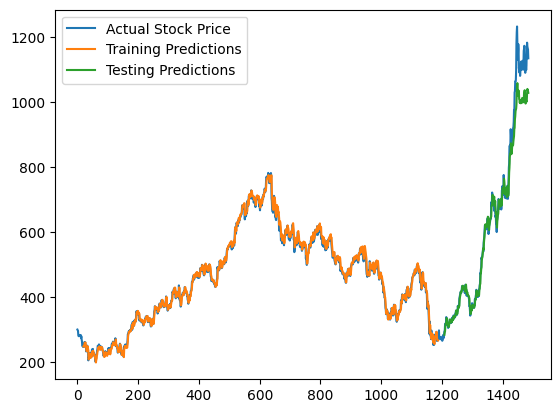

In [158]:
# Plot the results
trainPredictPlot = np.empty_like(data_normalized)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

testPredictPlot = np.empty_like(data_normalized)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2):len(data_normalized), :] = testPredict

plt.plot(scaler.inverse_transform(data_normalized), label='Actual Stock Price')
plt.plot(trainPredictPlot, label='Training Predictions')
plt.plot(testPredictPlot, label='Testing Predictions')
plt.legend()
plt.show()

In [159]:
#future predictions
future_steps = 30
future_data = data_normalized[-look_back:].reshape(1, 1, look_back)
future_predictions = []

for _ in range(future_steps):
    next_prediction = model.predict(future_data)
    future_predictions.append(next_prediction[0, 0])
    future_data = np.append(future_data[:, :, 1:], next_prediction.reshape(1, 1, 1), axis=2)

future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

1/1 [==============================] - 0s 21ms/step


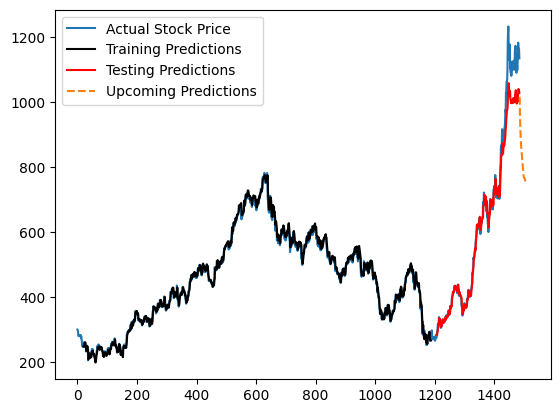

In [175]:
# Plot
plt.plot(scaler.inverse_transform(data_normalized), label='Actual Stock Price',linestyle='solid')
plt.plot(trainPredictPlot, label='Training Predictions',linestyle='solid',color='black')
plt.plot(testPredictPlot, label='Testing Predictions',color='red')

# Plot the upcoming predictions
future_steps_range = np.arange(len(data_normalized), len(data_normalized) + len(future_predictions))
plt.plot(future_steps_range, future_predictions, label='Upcoming Predictions', linestyle='dashed')

plt.legend()
plt.show()